**BELT EXAM**:

**STUDENT NAME:** Mwebaze Junior

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.ensemble import BaggingRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  accuracy_score
import missingno
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder#, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
# Set pandas as the default output for sklearn

In [24]:
file_name ='/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Belt2_B_diabetes_v2_final.csv'
df = pd.read_csv(file_name)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup,AgeGroup,Gender,Outcome
0,4,189.0,110.0,31.0,NaN,0_68,overweight,18 - 44,F,0
1,2,157.0,74.0,35.0,440.0,0.134,obese_2,18 - 44,F,0
2,6,98.0,58.0,33.0,190.0,0.43,obese_1,18 - 44,F,0
3,6,111.0,64.0,39.0,NaN,0.26,obese_1,18 - 44,F,0
4,3,106.0,72.0,NaN,NaN,0_207,overweight,18 - 44,F,0


In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
DiabetesPedigreeFunction     object
WeightGroup                  object
AgeGroup                     object
Gender                       object
Outcome                       int64
dtype: object

In [ ]:
df.shape

(642, 10)

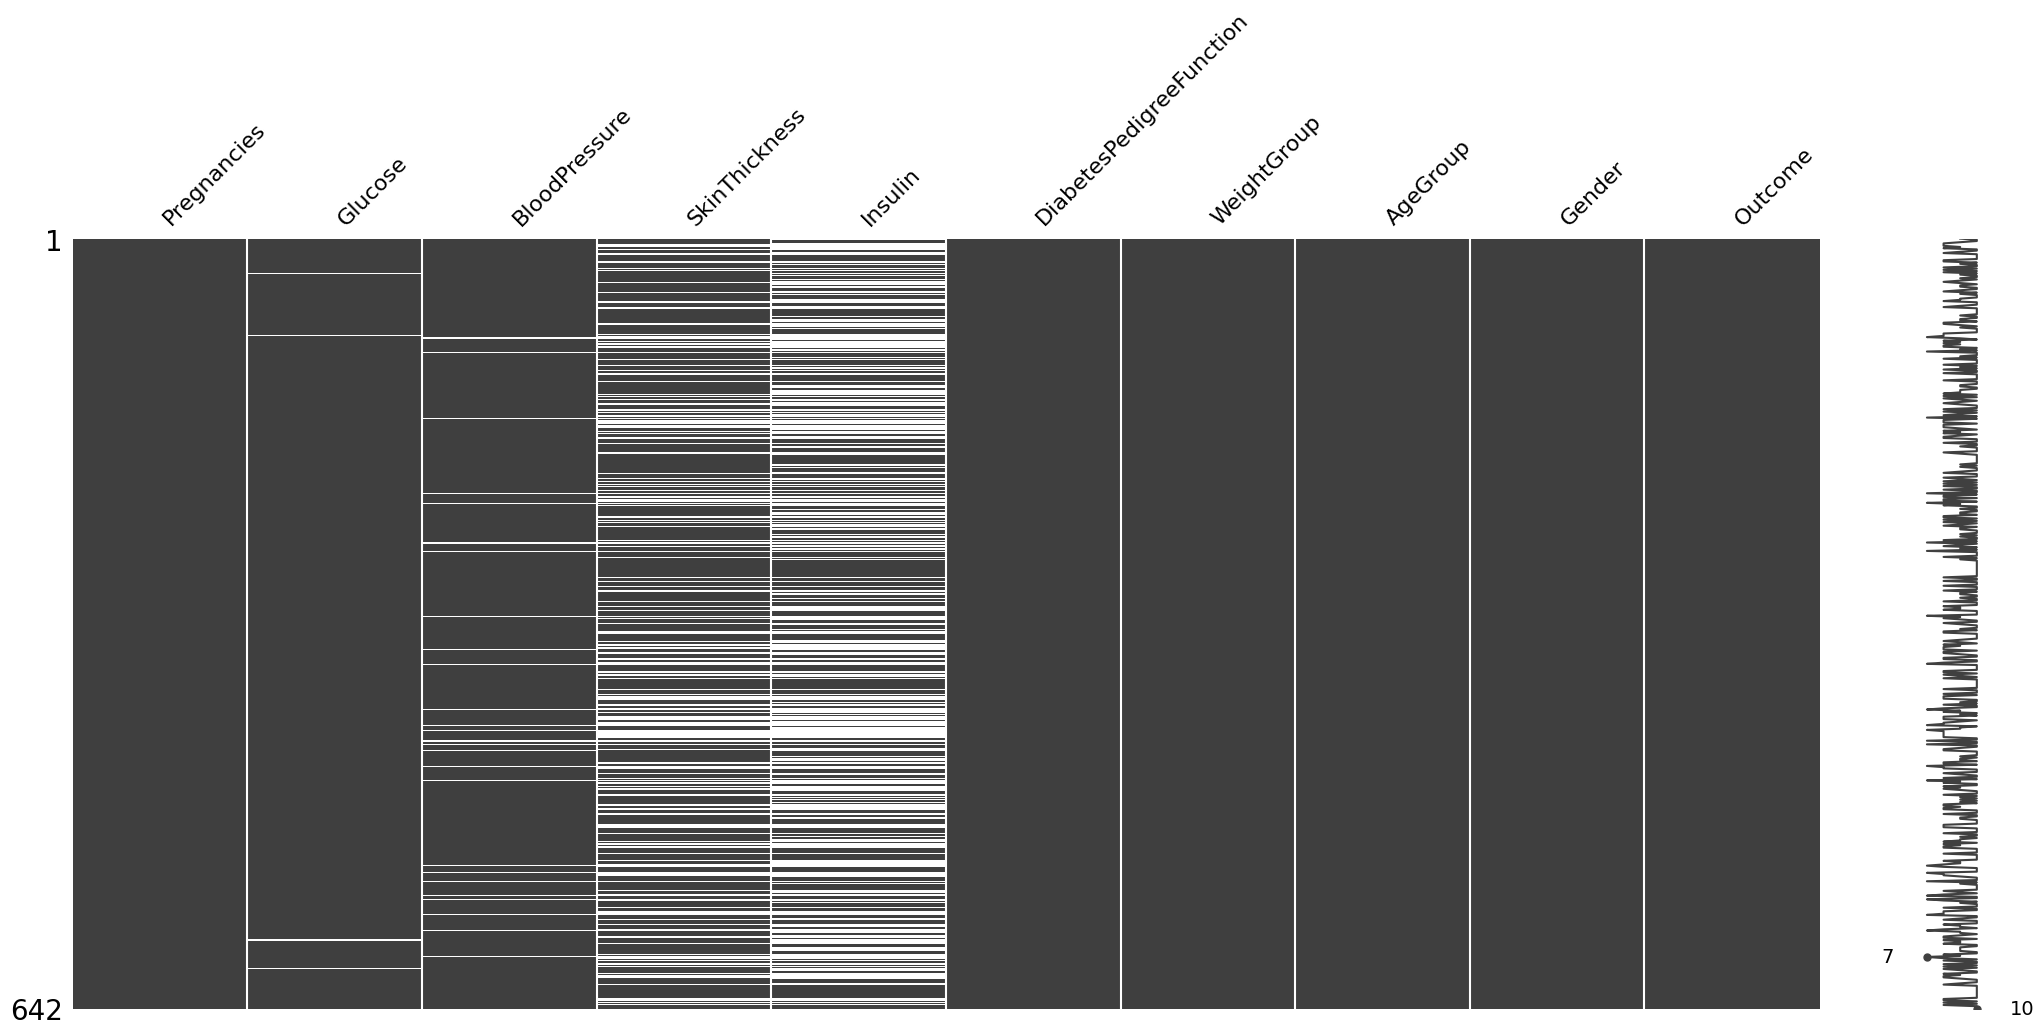

In [7]:
# Plot missing values
msno.matrix(df)
plt.show()

In [8]:
# Check for missing values counts
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Pregnancies                   0
Glucose                       4
BloodPressure                26
SkinThickness               187
Insulin                     311
DiabetesPedigreeFunction      0
WeightGroup                   0
AgeGroup                      0
Gender                        0
Outcome                       0
dtype: int64


<Axes: >

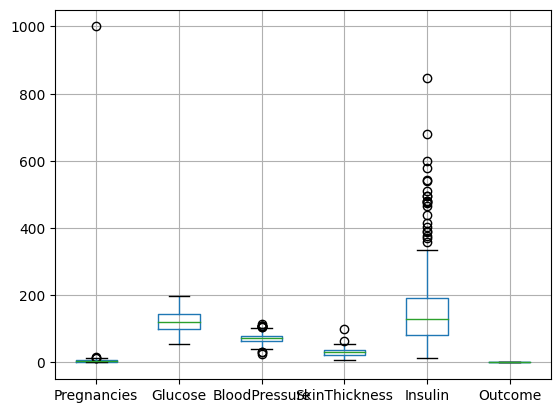

In [9]:
#use a box plot to check if you have out of range values in the columns
df.boxplot()

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup,AgeGroup,Gender,Outcome
0,4,189.0,110.0,31.0,NaN,0_68,overweight,18 - 44,F,0
1,2,157.0,74.0,35.0,440.0,0.134,obese_2,18 - 44,F,0
2,6,98.0,58.0,33.0,190.0,0.43,obese_1,18 - 44,F,0
3,6,111.0,64.0,39.0,NaN,0.26,obese_1,18 - 44,F,0
4,3,106.0,72.0,NaN,NaN,0_207,overweight,18 - 44,F,0


In [ ]:
#handling data inconsistences in the DiabetesPedigreeFunction column by replacing '_'
distinct_values = sorted(df['DiabetesPedigreeFunction'].unique(), reverse=True)
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].str.replace('_', '.')
distinct_values

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup,AgeGroup,Gender,Outcome
0,4,189.0,110.0,31.0,NaN,0.68,overweight,18 - 44,F,0
1,2,157.0,74.0,35.0,440.0,0.134,obese_2,18 - 44,F,0
2,6,98.0,58.0,33.0,190.0,0.43,obese_1,18 - 44,F,0
3,6,111.0,64.0,39.0,NaN,0.26,obese_1,18 - 44,F,0
4,3,106.0,72.0,NaN,NaN,0.207,overweight,18 - 44,F,0


In [29]:
# Save list of numeric columns
num_cols = df.select_dtypes('number').columns
# Constructing numeric preprocesssing objects
#Impute missing values with the median in each column
numeric_col = df.select_dtypes('number').columns
for column in numeric_col:
    num_imputer = df[column].median()  # Get the median value in the column
    df[column].fillna(num_imputer, inplace=True)
#num_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
num_pipe = make_pipeline(num_imputer, scaler)
num_tuple = ('num',num_pipe, num_cols)
num_tuple

('num',
 Pipeline(steps=[('float64', 0.0), ('standardscaler', StandardScaler())]),
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'Outcome'],
       dtype='object'))

**Write a justification of your strategy for imputing missing values**

i decided to use the median imputer because some numeric columns have outliers and do using mean might fill the data set with outlier values in our model data set

In [30]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
DiabetesPedigreeFunction    0
WeightGroup                 0
AgeGroup                    0
Gender                      0
Outcome                     0
dtype: int64


In [31]:
#convert all column to corresponding data types in the data dictioanary
df['Outcome'] = df['Outcome'].astype(int)
df['Pregnancies'] = df['Pregnancies'].astype(int)
df['BloodPressure'] = df['BloodPressure'].astype(int)
df['SkinThickness'] = df['SkinThickness'].astype(int)
df['Insulin'] = df['Insulin'].astype(int)
df['Glucose'] = df['Glucose'].astype(int)
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].astype(float)

In [14]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
DiabetesPedigreeFunction    float64
WeightGroup                  object
AgeGroup                     object
Gender                       object
Outcome                       int64
dtype: object

<Axes: >

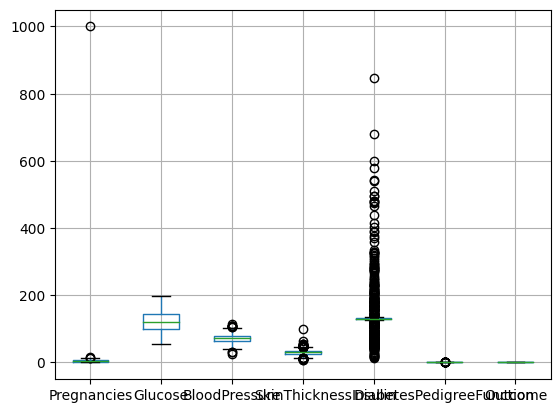

In [16]:
#diplay outliers int the data set
df.boxplot()

In [32]:
df['Gender'] = df['Gender'].str.replace('m', 'M')

In [33]:
#check for inconsistennces in Gender column
distinct_values2 = sorted(df['Gender'].unique(), reverse=True)
distinct_values2

['M', 'F']

In [34]:
#check for inconsistennces in WeightGroup column
distinct_values3 = sorted(df['WeightGroup'].unique(), reverse=True)
distinct_values3

['underweight',
 'overweight',
 'obsese_3',
 'obese_2',
 'obese_1',
 'healthy weight',
 'MISSING']

In [35]:
# Find the most common value in the column
most_common_value = df['WeightGroup'].mode()[0]
# Replace specific value with the most common value
specific_value_to_replace = 'MISSING'
df['WeightGroup'] = df['WeightGroup'].replace(specific_value_to_replace, most_common_value)

In [36]:
#check for inconsistennces in WeightGroup column
distinct_values3 = sorted(df['WeightGroup'].unique(), reverse=True)
distinct_values3

['underweight',
 'overweight',
 'obsese_3',
 'obese_2',
 'obese_1',
 'healthy weight']

In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup,AgeGroup,Gender,Outcome
637,5,144,82,26,285,0.452,obese_1,45 - 64,F,1
638,4,171,72,30,130,0.479,obsese_3,18 - 44,F,1
639,8,176,90,34,300,0.467,obese_1,45 - 64,F,1
640,0,104,64,37,64,0.510,obese_1,18 - 44,M,1
641,0,180,78,63,14,2.420,obsese_3,18 - 44,M,1


In [37]:
#check for inconsistennces in WeightGroup column
distinct_values4 = sorted(df['AgeGroup'].unique(), reverse=True)
distinct_values4

['>65', '<65', '45 - 64', '18 - 44']

Explore the data

    Create at least two different types of exploratory visualizations.
    Write one to two sentences about what each visualization tells you about the data. **bold text**

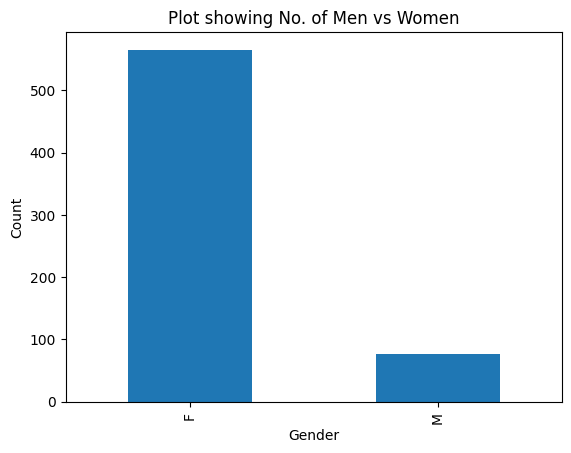

In [38]:
# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Create a bar plot
gender_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Plot showing No. of Men vs Women')

# Show the plot
plt.show()

**the barplot above shows that the collected data has more females to be tested that men.**

In [ ]:
# Find correlations
corr = df.corr(numeric_only = True)
corr.round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome
Pregnancies,1.00,0.06,0.02,0.06,-0.01,0.04,0.07
Glucose,0.06,1.00,0.21,0.19,0.41,0.14,0.51
BloodPressure,0.02,0.21,1.00,0.19,0.05,-0.03,0.18
SkinThickness,0.06,0.19,0.19,1.00,0.12,0.10,0.23
Insulin,-0.01,0.41,0.05,0.12,1.00,0.07,0.22
DiabetesPedigreeFunction,0.04,0.14,-0.03,0.10,0.07,1.00,0.21
Outcome,0.07,0.51,0.18,0.23,0.22,0.21,1.00


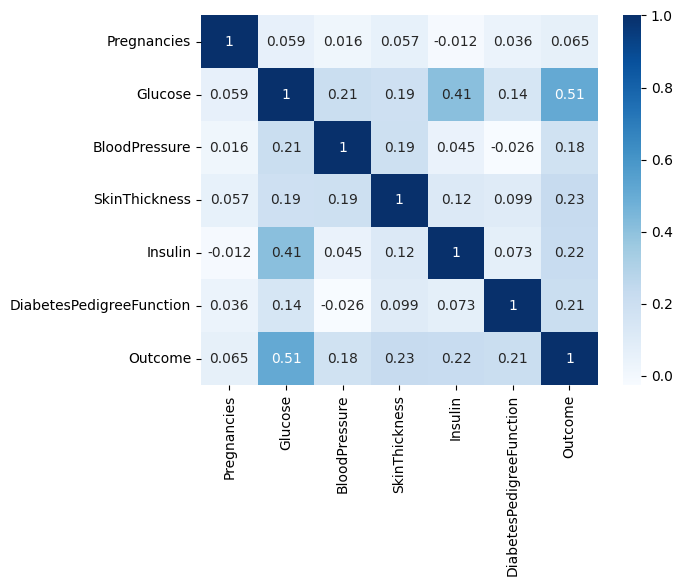

In [ ]:
# Make a heatmap using the correlations from above
sns.heatmap(corr, cmap = 'Blues', annot = True);

1. **from the heatmap plot above, its  well identified that there is a moderate correlation between insulin and glucose**

2. **there is no correlation between diabetesdigreefunction and blood pressure**

In [39]:
# split in to train and test
target = 'Outcome'
X = df.drop(columns=target)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup_healthy weight,WeightGroup_obese_1,WeightGroup_obese_2,WeightGroup_obsese_3,WeightGroup_overweight,WeightGroup_underweight,AgeGroup_18 - 44,AgeGroup_45 - 64,AgeGroup_<65,AgeGroup_>65,Gender_F,Gender_M
29,6,165,68,26,168,0.631,False,True,False,False,False,False,False,True,False,False,True,False
148,1,84,64,23,115,0.471,False,False,True,False,False,False,True,False,False,False,True,False
612,13,126,90,30,130,0.583,False,False,False,True,False,False,True,False,False,False,True,False
210,1,99,72,30,18,0.412,False,False,True,False,False,False,True,False,False,False,True,False
299,1,79,75,30,130,0.396,False,True,False,False,False,False,True,False,False,False,True,False


In [ ]:
# One-hot encode all categorical columns
x_train_encoded = pd.get_dummies(X_train, columns=X_train.select_dtypes(include='object').columns)
X_train = x_train_encoded
print(X_train)


In [ ]:
# One-hot encode all categorical columns
df_encoded_test = pd.get_dummies(X_test, columns=X_test.select_dtypes(include='object').columns)
X_test = df_encoded_test
print(X_test)

In [ ]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup_healthy weight,WeightGroup_obese_1,WeightGroup_obese_2,WeightGroup_obsese_3,WeightGroup_overweight,AgeGroup_18 - 44,AgeGroup_45 - 65,Gender_F,Gender_M
86,6,80,80,36,130,0.177,False,False,True,False,False,True,False,True,False
192,9,123,70,44,94,0.374,False,True,False,False,False,True,False,True,False
479,6,195,70,30,130,0.328,False,True,False,False,False,True,False,True,False
616,0,162,76,36,130,0.364,False,False,False,True,False,True,False,False,True
72,0,141,84,26,130,0.433,False,True,False,False,False,True,False,False,True


In [ ]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup_healthy weight,WeightGroup_obese_1,WeightGroup_obese_2,WeightGroup_obsese_3,WeightGroup_overweight,WeightGroup_underweight,AgeGroup_18 - 44,AgeGroup_45 - 65,AgeGroup_<65,Gender_F,Gender_M
29,6,165,68,26,168,0.631,False,True,False,False,False,False,False,True,False,True,False
148,1,84,64,23,115,0.471,False,False,True,False,False,False,True,False,False,True,False
612,13,126,90,30,130,0.583,False,False,False,True,False,False,True,False,False,True,False
210,1,99,72,30,18,0.412,False,False,True,False,False,False,True,False,False,True,False
299,1,79,75,30,130,0.396,False,True,False,False,False,False,True,False,False,True,False


In [43]:
# Get list of numeric columns and instantiate a StandardScaler
num_cols = X_train.select_dtypes('number').columns
scaler = StandardScaler()
# Construct the tuple for column transformer with the scaler
num_tuple = ('numeric',scaler, num_cols)
num_tuple

('numeric',
 StandardScaler(),
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'DiabetesPedigreeFunction'],
       dtype='object'))

In [44]:
# Get list of categorical columns and instantiate a OneHotEncoder
cat_cols = X_train.select_dtypes('object').columns
encoder_ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
# Construct the tuple for column transformer with the encoder
cat_tuple = ('categorical',encoder_ohe, cat_cols)
cat_tuple

('categorical',
 OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 Index([], dtype='object'))

In [45]:
# Instantiate the preprocessor/ColumnTransformer
preprocessor = ColumnTransformer([num_tuple, cat_tuple],
                                 verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction'],
      dtype='object')),
                                ('categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index([], dtype='object'))],
                  verbose_feature_names_out=False)

In [46]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)


In [47]:
# Instantiate a linear regression model
linreg = LinearRegression()
# Combine the preprocessing ColumnTransformer and the linear regression model in a Pipeline
linreg_pipe = make_pipeline(preprocessor, linreg)
linreg_pipe


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index([], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [48]:
# Fit the model pipeline on the training data
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index([], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [49]:
# Obtain Model Evulation using custom function
evaluate_regression(linreg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 0.356
- MSE = 0.173
- RMSE = 0.416
- R^2 = 0.294

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 0.360
- MSE = 0.166
- RMSE = 0.407
- R^2 = 0.291


In [50]:
# Instantiate a Default Model
bagreg = BaggingRegressor(random_state = 42)
# Model Pipeline with default preprocessor and default model
bagreg_pipe = make_pipeline(preprocessor, bagreg)
# Fit the model pipeline on the training data only
bagreg_pipe.fit(X_train, y_train)
# Call custom function for evaluation
evaluate_regression(bagreg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 0.117
- MSE = 0.032
- RMSE = 0.179
- R^2 = 0.870

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 0.362
- MSE = 0.210
- RMSE = 0.458
- R^2 = 0.101


In [51]:
# Instantiate default random forest model
rf = RandomForestRegressor(random_state = 42)
# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)


In [52]:
# Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index([], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [53]:
# Use custom function to evaluate default model
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 0.123
- MSE = 0.026
- RMSE = 0.160
- R^2 = 0.895

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 0.368
- MSE = 0.201
- RMSE = 0.448
- R^2 = 0.141


In [ ]:
# Parameters for tuning
rf_pipe.get_params()

In [57]:
# Define param grid with options to try
params = {'randomforestregressor__max_depth': [None,10,15,20],
          'randomforestregressor__n_estimators':[10,100,150,200],
          'randomforestregressor__min_samples_leaf':[2,3,4],
          'randomforestregressor__max_features':['sqrt','log2',None],
          'randomforestregressor__oob_score':[True,False],
          }

In [ ]:
# Instantiate the gridsearch
gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv = 3, verbose=1)
# Fit the gridsearch on training data
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [61]:
# Define and refit best model
best_rf = gridsearch.best_estimator_
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 0.261
- MSE = 0.099
- RMSE = 0.314
- R^2 = 0.599

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 0.365
- MSE = 0.181
- RMSE = 0.425
- R^2 = 0.225


**Conclusion**

Looking at the results of the three models above, to me i would choose the LinearRegression model as the better model to be used since bothe the results of both the trained data and test data are almost close to each other.
